In [146]:
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        dataset = events.metadata['dataset']
        print("--------------------",events.jetM)
        jet = ak.zip(
            {
                "jetM": ak.flatten(events.jetM),
                
               
                "a_m": ak.flatten(events.a_m),
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
       
        h_mass = (
            hist.Hist.new
            .StrCat(["jetmass", "A_mass"], name="sign")
            .Log(26, 3.6, 14., name="mass", label="Mass [GeV]")
            .Int64()
        )

        h_mass.fill(sign="jetmass", mass=jet.jetM)

        h_mass.fill(sign="A_mass", mass=jet.a_m)

        return {
            dataset: {
                "entries": len(events),
                "mass": h_mass,
            }
        }

    def postprocess(self, accumulator):
        pass

In [148]:
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema

filename = "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_999.root"
file = uproot.open(filename)
events = NanoEventsFactory.from_root(
    file,
    treepath='/fevt/RHTree',
    # "RHTree",
    entry_start=None,
    entry_stop=1,
    metadata={"dataset": "jet"},
    schemaclass=BaseSchema,
).events()
p = MyProcessor()
out = p.process(events)
out

-------------------- [[12.2, 7.75]]


{'jet': {'entries': 1,
  'mass': Hist(
    StrCategory(['jetmass', 'A_mass'], name='sign'),
    Regular(26, 3.6, 14, transform=log, name='mass', label='Mass [GeV]'),
    storage=Int64()) # Sum: 4.0}}

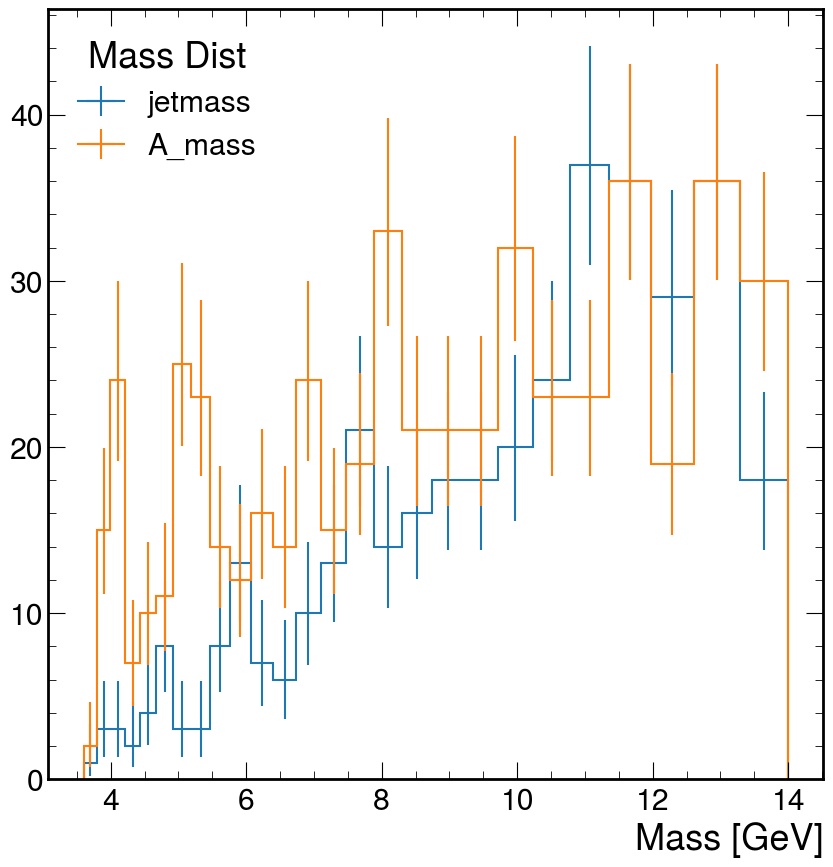

In [88]:
fig, ax = plt.subplots()
out["jet"]["mass"].plot1d(ax=ax)
# ax.set_xscale("log")
ax.legend(title="Mass Dist")
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

In [125]:
fileset1 = {
    'valid_mass': [
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_264.root', 
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_265.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_266.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_267.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_268.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_269.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_270.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_271.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_272.root',
    ],
    'train_mass':[
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_990.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_991.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_992.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_995.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_995.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_996.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_997.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_998.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_999.root",
    ]
}


In [140]:
with open("aToTauTau_hadronic_train.json", "r") as fin:
    file_list_train = json.load(fin)
with open("Upsilon_TauTau_hadronic_validation.json", "r") as fin:
    file_list_valid = json.load(fin)    
    
             
fileset = {
    'train_mass': file_list_train ,
    'valid_mass': file_list_valid
                  
}


In [141]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=10),
    schema=BaseSchema,
    # maxchunks=10,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    # "RHTree",
    processor_instance=MyProcessor()
)
out

Output()

Output()

{'valid_mass': {'entries': 955339,
  'mass': Hist(
    StrCategory(['jetmass', 'A_mass'], name='sign'),
    Regular(26, 3.6, 14, transform=log, name='mass', label='Mass [GeV]'),
    storage=Int64()) # Sum: 1702632.0 (1917208.0 with flow)},
 'train_mass': {'entries': 356611,
  'mass': Hist(
    StrCategory(['jetmass', 'A_mass'], name='sign'),
    Regular(26, 3.6, 14, transform=log, name='mass', label='Mass [GeV]'),
    storage=Int64()) # Sum: 965830.0 (1121464.0 with flow)}}

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Preliminary'))

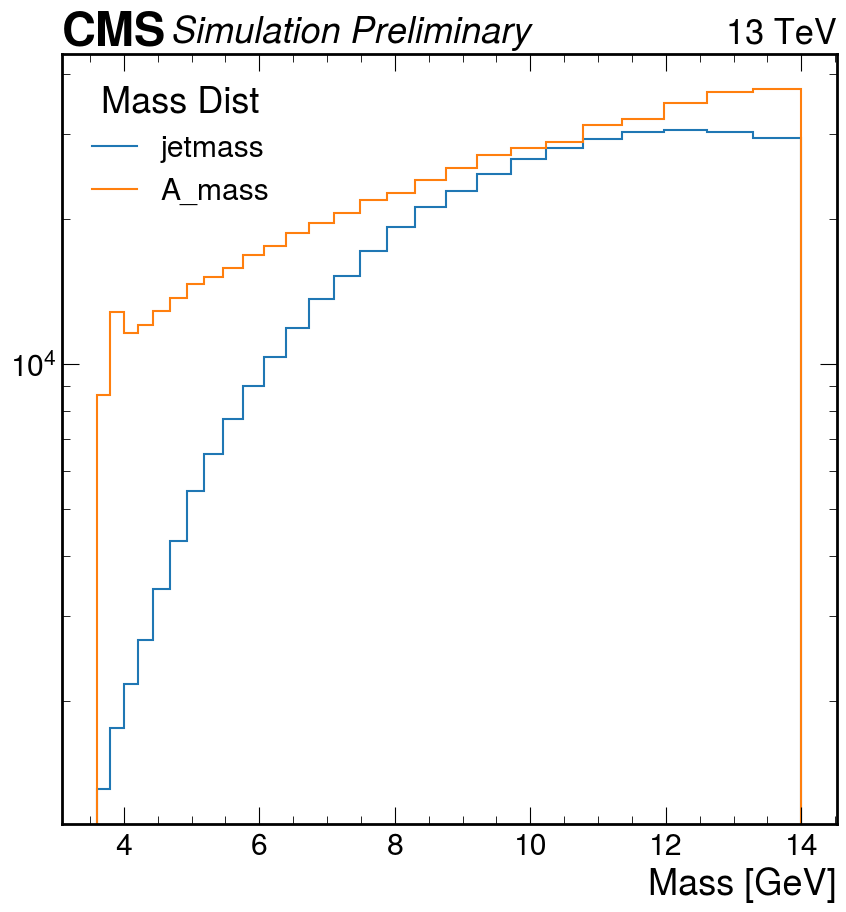

In [144]:
fig, ax = plt.subplots()
out["train_mass"]["mass"].plot1d(ax=ax)
ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Preliminary'))

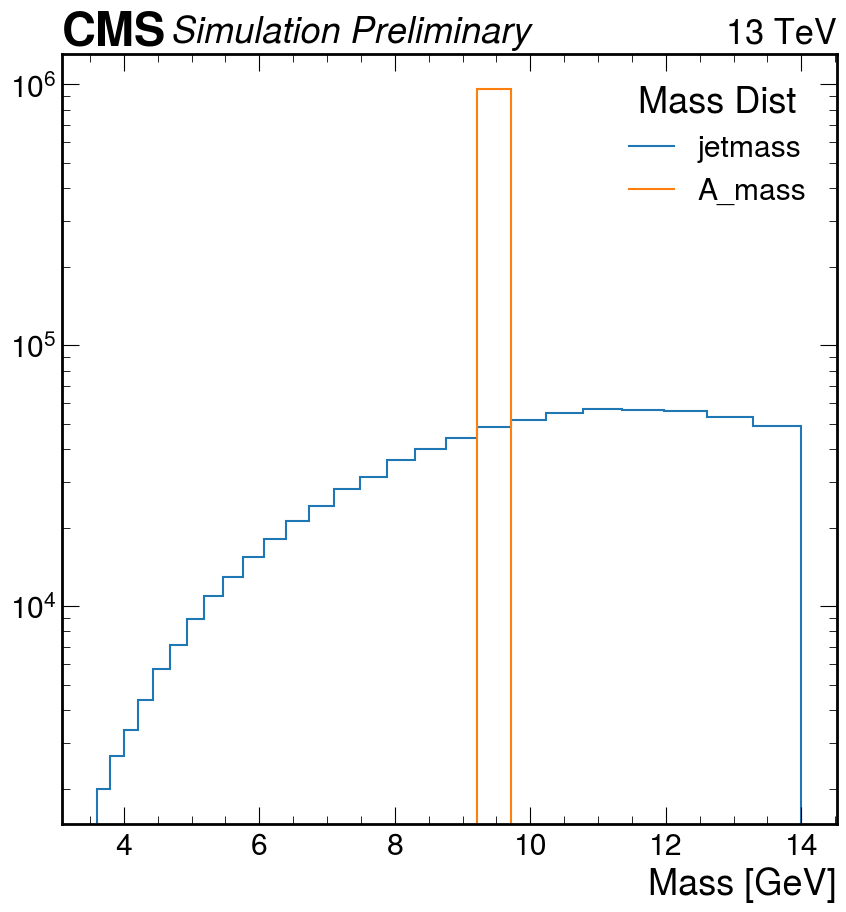

In [145]:
fig, ax = plt.subplots()
out["valid_mass"]["mass"].plot1d(ax=ax)
ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)